In [3]:
import sys
sys.path.insert(1, '../../decode_eeg/')
import decode_eeg
import numpy as np
np.random.seed(42)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
experiment_name1 = '1801'
experiment_name2 = '1901'
experiment_name3 = '1902'
data_dir1 = f'./data/{experiment_name1}'
data_dir2 = f'./data/{experiment_name2}'
data_dir3 = f'./data/{experiment_name3}'

exp1 = decode_eeg.Experiment(experiment_name1,data_dir1)
exp2 = decode_eeg.Experiment(experiment_name2,data_dir2)
exp3 = decode_eeg.Experiment(experiment_name3,data_dir3)

In [5]:
time_window = 25
time_step = 25
trial_average = 20
n_splits = 500
group_dict = {0:[1],1:[2],2:[3],3:[4]}
wrangl = decode_eeg.Wrangler(exp1.info['times'],time_window,time_step,trial_average,n_splits)

sync = decode_eeg.Experiment_Syncer(experiments=[exp1,exp2,exp3],
                                    wrangler = wrangl,
                                    train_group = [experiment_name1,experiment_name2])

clfr = decode_eeg.Classification(wrangl,sync.nsub,num_labels=4)

In [6]:
for isub,sub in enumerate(sync.matched_ids):
    xdata,ydata = sync.load_eeg(sub)
    xdata,ydata = sync.setup_data(xdata,ydata)
    xdata_train,xdata_test,ydata_train,ydata_test = sync.group_data(xdata,ydata)
    for X_train_all, X_test_all, y_train, y_test in wrangl.train_test_custom_split(xdata_train,xdata_test,ydata_train,ydata_test):
        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
                clfr.decode(X_train,X_test,y_train,y_test,isub)

100.0%

In [7]:
clfr.wrangl.labels = [1,2,3,4]
interp = decode_eeg.Interpreter(clfr, subtitle = f'single_feature_to_conj_trialbin{trial_average}_')
interp.save_results()


Saving output\figures\single_feature_to_conj_trialbin20_acc20200530_1331.pdf
Saving output\figures\single_feature_to_conj_trialbin20_acc20200530_1331.png


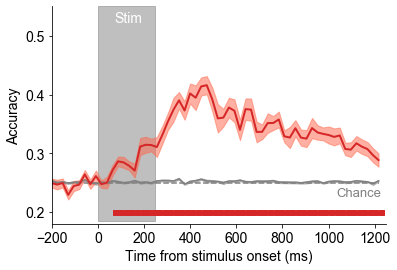

In [10]:
interp.plot_acc(significance_testing=True,savefig=True)